In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20

LOADING CSV and MYSQL


In [4]:
df=pd.read_csv("D:\OneDrive - AVASA\BYU-I\In-learning\python pandas analytics\Rev2022.csv")
dfrev=pd.DataFrame(df)
list(dfrev.columns)

['BRAND',
 'status',
 'dbr_date_out',
 'dbr_date',
 'loc_out',
 'LOCACION_in',
 'empl_out',
 'gate_agent',
 'number',
 'Prep_Fuel',
 'res_no',
 'rulefl_prod',
 'source_code',
 'CLOSE_MISC',
 'veh_class',
 'veh_class.1',
 'ECONOMICO',
 'MODEL',
 'cdpid',
 'CORP_Name',
 'RA_Points',
 'Odom_in',
 'Odom_out',
 'Last_Name',
 'rent_days',
 'dbr_days',
 'bun_time_chg',
 'unbun_time_chg',
 'ret_inc_chg',
 'vch_inc_chg',
 'mile_chg',
 'disc_chg',
 'csadj_chg',
 'promo_chg',
 'estimate',
 'age24_chg',
 'baby_chg',
 'movpk_chg',
 'cccp_chg',
 'cvg2_chg',
 'cvg3_chg',
 'cvg4_chg',
 'cvg5_chg',
 'cvg6_chg',
 'delco_chg',
 'drivr_chg',
 'fpfee_chg',
 'drop_chg',
 'fuel_chg',
 'ppd_fuel_chg',
 'ldwba_chg',
 'ldwpl_chg',
 'ldwpr_chg',
 'ldwc1_chg',
 'ldwc9_chg',
 'cvg7_chg',
 'cotg_chg',
 'icem_chg',
 'icem2_chg',
 'safe_chg',
 'prert_chg',
 'presr_chg',
 'gopro_chg',
 'tag_chg',
 'scand_chg',
 'hsp_chg',
 'tvlpk_chg',
 'self_chg',
 'ldw0_chg',
 'ldw1_chg',
 'ldw10_chg',
 'ldw11_chg',
 'ldw12_chg',
 '

In [16]:
import mysql.connector as mysql

HOST = "mysql3001.mochahost.com"
DATABASE = "brbr77_avasanet"
USER = "brbr77_auditor"
PASSWORD = "BrainPowder"

db_connection = mysql.connect(host=HOST, 
                              database=DATABASE, 
                              user=USER, 
                              password=PASSWORD)

print("Connected to:", db_connection.get_server_info())

Connected to: 5.6.33


In [17]:
data_veh=pd.read_sql("SELECT * FROM vehiculos",db_connection)
#list(data_veh.columns)
#data_veh.describe()
data_veh.head(10)

,id,Veh_number,Curr_odom,status_id,Notes,Year,Model,Color,Vin,Purch_date,...,locaciones_id,tank_size,tank2_size,class,sales_date,sales_price,turnback_check,make,options,type
0,1,KE0028,16,16,MEGA OAXACA SA DE CV,20.0,SEDONA,PLATA LJ,KNDMB5C25L6602934,2019-10-14,...,802,80.0,0.0,R,2021-08-12,395000.0,B,KIA,SEDONA LX,LX AUT
1,2,KE0029,16,16,FRANCOMOTORS AUTOMOTRIZ SA DE,20.0,SEDONA,AZUL LJ,KNDMB5C28L6602958,2019-10-14,...,214,80.0,0.0,R,2021-10-19,399000.0,B,KIA,SEDONA LX,LX AUT
2,3,KE0030,16,16,ABUSO DE CONFIANZA,20.0,SEDONA,BLANC EN,KNDMB5C28L6602698,2019-10-14,...,603,80.0,0.0,R,2022-12-27,331200.0,.,KIA,LX,SEDONA
3,4,KE0031,12,12,,20.0,SEDONA,PLATA EN,KNDMB5C24L6584104,2019-10-14,...,181,80.0,0.0,R,None,0.0,.,KIA,LX,SEDONA
4,5,KE0032,16,16,JUAN LUIS RODRIGUEZ VARGAS,20.0,SEDONA,BLANC LJ,KNDMB5C20L6602694,2019-10-14,...,1489,80.0,0.0,R,2021-11-19,439900.0,B,KIA,SEDONA LX,LX AUT
5,6,KE0033,16,16,ANGAR AZCAPOTZALCO SA DE CV,20.0,SEDONA,BLANC LJ,KNDMB5C27L6602420,2019-10-14,...,259,80.0,0.0,R,2021-05-18,392000.0,,KIA,SEDONA LX,LX AUT
6,7,KE0034,16,16,AUTOMOTRIZ BONN SA DE CV,20.0,SEDONA,BLANC LJ,KNDMB5C24L6602696,2019-10-14,...,328,80.0,0.0,R,2021-09-14,395000.0,B,KIA,SEDONA LX,LX AUT
7,8,CA0352,16,16,CENTAURO AUTOMOTRIZ,20.0,CAVALILT,TERRA LJ,LSGKB54H6LV041065,2020-02-20,...,46,46.0,0.0,F,2021-07-10,215000.0,B,CHE,CAVALIER L,LT AUT
8,10,KF0325,16,16,ROSA ELIA RAMIREZ NU=D1EZ,20.0,FORTELX,BLANCO,3KPF24AD6LE193831,2019-12-16,...,1489,50.0,0.0,G,2022-10-06,260000.0,,KIA,LX,FORTE
9,11,VV0B09,16,16,AUTOS SS DE SAN LUIS POTOSI SA,20.0,VENTO,PLATA LJ,MEX512606LT047890,2019-12-06,...,214,55.0,0.0,D,2021-08-03,171000.0,B,VW,STARTLINE,STARTLIN


In [49]:
dfveh=pd.DataFrame(data_veh,columns=["Veh_number","Year","status_id","make"])
#dfveh.groupby("make").sum() # group by to check
dfveh.where(dfveh["status_id"]>1)

,Veh_number,Year,status_id,make
0,KE0028,20.0,16.0,KIA
1,KE0029,20.0,16.0,KIA
2,KE0030,20.0,16.0,KIA
3,KE0031,20.0,12.0,KIA
4,KE0032,20.0,16.0,KIA
...,...,...,...,...
56756,VA3129,23.0,12.0,CHE
56757,VA3130,23.0,12.0,CHE
56758,356747,90.0,3.0,CADILLAC
56759,843749,90.0,12.0,CHEVROLE


practice mathlib

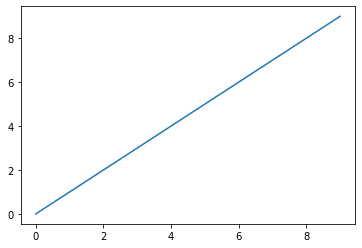

In [57]:
%matplotlib inline
datap = np.arange(10)
datap
plt.plot(datap)

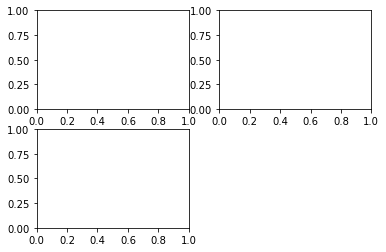

In [97]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

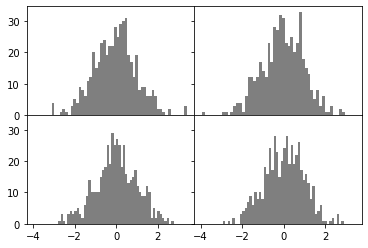

In [60]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
#! figure,id=mpl_subplots_adjust,width=4in,title="Data visualization with no inter-subplot spacing"
fig.subplots_adjust(wspace=0, hspace=0)

In [111]:
plt.close("all")


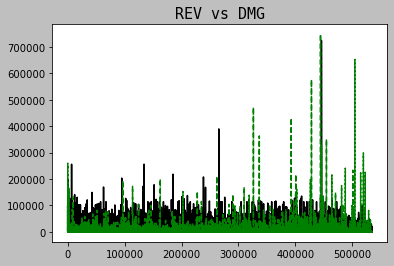

In [52]:
fig = plt.figure()
ax = fig.add_subplot()
data = pd.DataFrame(dfrev,columns=["rpt_as_rev"])
data1 = pd.DataFrame(dfrev,columns=["dmg_chg"])

ax.plot(data, color="black", linestyle="solid",drawstyle="steps-post", label="rev"); #solid line
ax.plot(data1, color="green", linestyle="dashed",drawstyle="steps-post", label="dmg"); #solid line
#ax.legend()
ax.set_title("REV vs DMG", family="monospace",fontsize=15)
plt.style.use('grayscale')
ax.set_xlabel="RPT"
ax.set_ylabel="dmg"

In [51]:
plt.close("all")

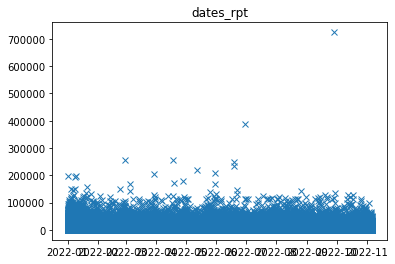

In [84]:
fig = plt.figure()
ax = fig.add_subplot()
dfy=pd.DataFrame(dfrev,columns=["rpt_as_rev"])
dfx=pd.DataFrame(dfrev,columns=["dbr_date"])
dfx
dfx1=pd.to_datetime(dfx["dbr_date"])
ax.plot(dfx1, dfy,"x")
ax.set_title("dates_rpt")
ax.set_ylabel="rpt"

<AxesSubplot:>

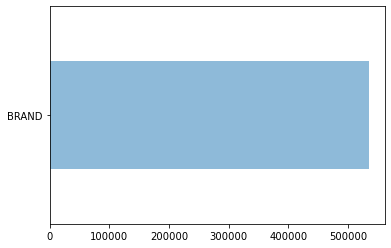

In [8]:
dfy1=pd.DataFrame(dfrev,columns=["BRAND"]).count()
#dfy1.plot.bar()
dfy1.plot.barh(stacked=True, alpha=0.5)

GROUPING

In [24]:
dfrev
grouped=dfrev.groupby(df["ECONOMICO"])
grouped.sum()

,CLOSE_MISC,RA_Points,Odom_in,Odom_out,rent_days,dbr_days,bun_time_chg,unbun_time_chg,ret_inc_chg,vch_inc_chg,...,alf_fee_chg,ff_fee_chg,dmg_chg,schr_chg,vlf_chg,iva_chg,rpt_as_rev,other_chg,EST_TOTAL,GROSS_REVENUE
ECONOMICO,,,,,,,,,,,,,,,,,,,,,
A41001,0.0,0,513102,503832,216.15,221.56,272829.92,180188.19,92641.73,597.49,...,15368.09,14346.08,5500.00,1505.30,14274.84,32558.58,334091.09,16096.96,391982.42,408189.10
A41002,5500.0,0,638360,619627,181.72,188.66,276666.97,190099.17,86567.80,726.94,...,23323.39,17853.00,30823.92,1259.88,14779.55,39156.43,350444.78,16017.69,406537.65,460619.49
A41003,0.0,0,557336,543969,196.53,202.32,224539.36,182449.88,42089.48,3494.80,...,29697.62,15353.37,4500.00,2223.10,14926.29,45329.51,339711.58,5456.30,386322.82,414143.35
A41004,0.0,0,487746,465163,213.52,219.33,382595.12,234541.00,148054.12,0.00,...,15381.62,17057.27,10775.86,1081.23,18270.63,33367.38,410102.92,20598.15,479941.59,506684.17
A41005,0.0,0,112857,107012,83.14,84.95,117485.21,87303.20,30182.01,0.00,...,10407.60,9391.81,37122.58,836.58,6570.25,23943.20,157083.56,10116.85,219023.82,231397.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZE2045,0.0,0,197009,182667,121.23,128.82,186968.78,98811.85,88156.93,5042.58,...,11516.76,3479.48,0.00,373.28,9999.18,13393.93,209007.01,69.58,242746.36,253490.43
ZE2046,0.0,0,195051,177686,134.71,140.48,197258.42,120521.24,76737.18,5118.72,...,15163.55,4056.39,0.00,735.68,10026.92,20405.66,214771.77,1620.00,253015.34,260117.45
ZE2047,0.0,0,474104,440345,127.75,131.80,258453.78,152763.48,105690.30,0.00,...,19384.66,8958.89,0.00,614.06,14210.07,22667.29,299281.51,900.00,364901.83,362216.77


In [27]:
grouped=dfrev["rpt_as_rev"].groupby(dfrev["ECONOMICO"])
grouped.sum()# group rpt by the column economico

ECONOMICO
A41001    334091.09
A41002    350444.78
A41003    339711.58
A41004    410102.92
A41005    157083.56
            ...    
ZE2045    209007.01
ZE2046    214771.77
ZE2047    299281.51
ZE2048    256061.85
ZE9003     12014.35
Name: rpt_as_rev, Length: 14419, dtype: float64

In [55]:
grouped=dfrev["rpt_as_rev"].groupby([dfrev["BRAND"],dfrev["MODEL"],dfrev["source_code"]]).sum()# group rpt by the column model
grouped.unstack()

source_code       APP  BOT  CAT         CLD  COM  OPS         REZ        RSV  \
BRAND   MODEL                                                                  
DOLLAR  1500      NaN  NaN  NaN   101270.96  NaN  NaN         NaN        NaN   
        220I      NaN  NaN  NaN   568514.35  NaN  NaN    15233.57        NaN   
        300C V6   NaN  NaN  NaN    49382.51  NaN  NaN    33533.85        NaN   
        320IA     NaN  NaN  NaN   352587.94  NaN  NaN    14177.15        NaN   
        420iA     NaN  NaN  NaN    26726.72  NaN  NaN         NaN        NaN   
...               ...  ...  ...         ...  ...  ...         ...        ...   
THRIFTY XTRAIL2R  NaN  NaN  NaN  5042130.94  NaN  NaN  2990588.09  318193.03   
        XTRAIL3   NaN  NaN  NaN         NaN  NaN  NaN         NaN        NaN   
        XTRAIL3R  NaN  NaN  NaN  3605463.26  NaN  NaN  2192353.93  138212.03   
        YUK XL 7  NaN  NaN  NaN   626927.06  NaN  NaN         NaN        NaN   
        ZEN M     NaN  NaN  NaN    22392.55  NaN  NaN         NaN    1073.47   

source_code       SME  VLC        WEB        XML  
BRAND   MODEL                                     
DOLLAR  1500      NaN  NaN        NaN        NaN  
        220I      NaN  NaN        NaN   10002.31  
        300C V6   NaN  NaN        NaN        NaN  
        320IA     NaN  NaN   15038.24        NaN  
        420iA     NaN  NaN        NaN        NaN  
...               ...  ...        ...        ...  
THRIFTY XTRAIL2R  NaN  NaN  566227.58  514149.71  
        XTRAIL3   NaN  NaN   11424.30        NaN  
        XTRAIL3R  NaN  NaN  300444.09  454006.56  
        YUK XL 7  NaN  NaN   16261.82        NaN  
        ZEN M     NaN  NaN        NaN    3081.64  

[838 rows x 12 columns]